In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df=pd.read_csv('/content/delhivery_data.csv')
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [191]:
# number of rows and columns:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 144867
Number of columns: 24


In [192]:
# droping columns 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'
df=df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)

In [193]:
# datatype and null values of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [194]:
# Total number of null values in each column
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [195]:
# dropping all the rows with null value as they are very nigligible
df=df.dropna(how='any').reset_index(drop=True)
df.isna().sum().sum()

0

In [196]:
# check for any dublicate rows
df.duplicated().sum()

0

In [197]:
# converting time columns from object dtype to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [198]:
# Renaming some columns to understand them better
df.rename({
        'osrm_time' : 'predicted_delivery_time',
        'osrm_distance' : 'predicted_delivery_distance',
        'segment_osrm_time' : 'predicted_segment_delivery_time',
        'segment_osrm_distance' : 'predicted_segment_delivery_distance',
        'start_scan_to_end_scan' : 'actual_source_and_destination_scan_time',
        'actual_distance_to_destination' : 'actual_delivery_distance',
        'segment_actual_time' : 'actual_segment_delivery_time',
        'actual_time' : 'actual_delivery_time'
    }, axis=1, inplace=True)

In [199]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_source_and_destination_scan_time,actual_delivery_distance,actual_delivery_time,predicted_delivery_time,predicted_delivery_distance,actual_segment_delivery_time,predicted_segment_delivery_time,predicted_segment_delivery_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.43566,14.0,11.0,11.9653,14.0,11.0,11.9653


In [200]:
# Descriptive Statistics
df.describe()

,trip_creation_time,od_start_time,od_end_time,actual_source_and_destination_scan_time,actual_delivery_distance,actual_delivery_time,predicted_delivery_time,predicted_delivery_distance,actual_segment_delivery_time,predicted_segment_delivery_time,predicted_segment_delivery_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


In [201]:
df.describe(include=object)

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,1497,2,14787,1496,1496,1466,1466
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104632,1812,99132,101,23267,23267,15192,15192


In [202]:
# trip_creation_time
total_days=df['trip_creation_time'].max()-df['trip_creation_time'].min()
print(f'Total days of data: {total_days.days}')

Total days of data: 21


In [203]:
# max actual time difference in minutes
diff=df['actual_delivery_time'].max()-df['actual_delivery_time'].min()
diff

4523.0

In [204]:
# percent of route type
df['route_type'].value_counts(normalize=True)*100

,proportion
route_type,
FTL,68.690928
Carting,31.309072


**Observations Features:**


1.   **data:** two uniques values stating if data is for training or testing
2.   **trip_creation_time:** The data is for 21 days for the trip creation timestamp
3. **route_type:** 2 unique route_type 'FTL' and 'Carting' with 69% FTL and 31% carting.
4. **source_name:** there are 1496 distinct sources from where trip started
5. **destination_name:** there are 1466 distinct distinations where trip ended
6. **actual_delivery_distance:** the average delivery distance is 234.7 Km with maximum distance 1927 Km
7. **actual_delivery_time:** the average delivery time is 418 minutes, with max time of delivery is 4523 minutes.

In [205]:
# Feature Engineering
def add_feature_city_and_state_name(series):
    city_series = series.str.split('(').apply(lambda x: x[0])
    state_series = series.str.split('(').apply(lambda x: x[1][:-1])
    return city_series, state_series

def feature_engineering_before_data_segregation_and_grouping(dataframe):

    # 1. calculating difference between 'od_start_time' and 'od_end_time'
    dataframe['calculated_source_and_destination_scan_time'] = (dataframe['od_end_time'] - dataframe['od_start_time']).apply(lambda x: x.total_seconds()/60)

    # 2. fetching city and state names from 'source_name' and 'destination_name'
    dataframe['source_city_name'], dataframe['source_state_name'] = add_feature_city_and_state_name(dataframe['source_name'])
    dataframe['destination_city_name'], dataframe['destination_state_name'] = add_feature_city_and_state_name(dataframe['destination_name'])

    # 3. one-hot encoding 'route_type' feature
    dataframe['route_type'] = dataframe['route_type'].apply(lambda x: 1 if x == 'Carting' else 0 if x == 'FTL' else np.nan)

    # 4. fetching time details from 'trip_creation_time' columns
    dataframe['trip_creation_year'] = dataframe['trip_creation_time'].dt.year
    dataframe['trip_creation_month'] = dataframe['trip_creation_time'].dt.month
    dataframe['trip_creation_date'] = dataframe['trip_creation_time'].dt.day
    dataframe['trip_creation_daytime'] = dataframe['trip_creation_time'].dt.time
    dataframe['trip_creation_day_of_week'] = dataframe['trip_creation_time'].dt.day_of_week

    columns_to_drop = ['trip_creation_time', 'od_end_time', 'od_start_time', 'source_name', 'destination_name']
    # checking if any of the above feature results in a column with only 1 unique value and if yes then adding it to the list 'columns_to_drop'
    for col in ['calculated_source_and_destination_scan_time', 'source_city_name', 'destination_city_name', 'route_type', 'trip_creation_year', 'trip_creation_month', 'trip_creation_date', 'trip_creation_time', 'trip_creation_day_of_week']:
        if dataframe[col].nunique() == 1:
            columns_to_drop.append(col)

    # dropping extraneous columns whose information has already been captured in the calculated fields
    dataframe.drop(columns_to_drop, axis=1, inplace=True)

    dataframe = dataframe[['data', 'trip_uuid', 'route_type', 'trip_creation_month', 'trip_creation_date', 'trip_creation_daytime', 'trip_creation_day_of_week', 'source_center', 'source_city_name', 'source_state_name', 'destination_center', 'destination_city_name', 'destination_state_name', 'actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']]

    return dataframe

df=feature_engineering_before_data_segregation_and_grouping(df)
df.head()

,data,trip_uuid,route_type,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,source_center,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,training,trip-153741093647649320,1,9,20,02:35:36.476840,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.213637,14.0,11.0,14.0,11.0,10.435660,11.9653,11.9653
1,training,trip-153741093647649320,1,9,20,02:35:36.476840,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.213637,24.0,20.0,10.0,9.0,18.936842,21.7243,9.7590
2,training,trip-153741093647649320,1,9,20,02:35:36.476840,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.213637,40.0,28.0,16.0,7.0,27.637279,32.5395,10.8152
3,training,trip-153741093647649320,1,9,20,02:35:36.476840,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.213637,62.0,40.0,21.0,12.0,36.118028,45.5620,13.0224
4,training,trip-153741093647649320,1,9,20,02:35:36.476840,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.213637,68.0,44.0,6.0,5.0,39.386040,54.2181,3.9153


In [206]:
# checking for any null value
df.isna().sum()

,0
data,0
trip_uuid,0
route_type,0
trip_creation_month,0
trip_creation_date,0
trip_creation_daytime,0
trip_creation_day_of_week,0
source_center,0
source_city_name,0
source_state_name,0


In [207]:
# creating sepearte dataframes for traing and testing data respectively
df_train=df[df['data']=='training'].reset_index(drop=True)
df_test=df[df['data']=='test'].reset_index(drop=True)

In [208]:
# creating dictionary for aggregation of each column
agg_dict = {
    'trip_creation_month' : 'first',
    'trip_creation_date' : 'first',
    'trip_creation_daytime' : 'first',
    'trip_creation_day_of_week' : 'first',
    'route_type' : 'first',
    'source_city_name' : 'first',
    'source_state_name'	: 'first',
    'destination_city_name' : 'first',
    'destination_state_name' : 'first',
    'actual_source_and_destination_scan_time' : 'first',
    'calculated_source_and_destination_scan_time' : 'first',
    'actual_delivery_time' : 'last',
    'predicted_delivery_time' : 'last',
    'actual_segment_delivery_time' : 'sum',
    'predicted_segment_delivery_time' : 'sum',
    'actual_delivery_distance' : 'sum',
    'predicted_delivery_distance' : 'last',
    'predicted_segment_delivery_distance' : 'sum'
}

In [209]:
# creating function to groupby
def groupby_dataframe(dataframe, groupby_columns_list, groupby_aggregation_dictionary):
    '''
    The function performs groupby action on the input dataframe

    :input_params
        1. dataframe: pd.DataFrame
        2. groupby_columns_list: list of columns to groupby on
        3. groupby_aggregation_dictionary: dictionary of aggregation type for different columns
    :return_values
        1. dataframe: pd.DataFrame
    '''
    return dataframe.groupby(by=groupby_columns_list, as_index=False).agg(agg_dict).reset_index(drop=True)
groupby_columns_list = ['trip_uuid', 'source_center', 'destination_center']
df_train_grouped_1 = groupby_dataframe(df_train, groupby_columns_list, agg_dict)
df_test_grouped_1 = groupby_dataframe(df_test, groupby_columns_list, agg_dict)

In [210]:
df_train_grouped_1.head()

,trip_uuid,source_center,destination_center,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,9,12,00:00:16.535741,2,0,Kanpur_Central_H_6,Uttar Pradesh,...,Haryana,1260.0,1260.604421,732.0,329.0,728.0,534.0,3778.765471,446.5496,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,9,12,00:00:16.535741,2,0,Bhopal_Trnsport_H,Madhya Pradesh,...,Uttar Pradesh,999.0,999.505379,830.0,388.0,820.0,474.0,5082.046634,544.8027,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,9,12,00:00:22.886430,2,1,Doddablpur_ChikaDPP_D,Karnataka,...,Karnataka,58.0,58.832388,47.0,26.0,46.0,26.0,53.310332,28.1994,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,9,12,00:00:22.886430,2,1,Tumkur_Veersagr_I,Karnataka,...,Karnataka,122.0,122.779486,96.0,42.0,95.0,39.0,186.897974,56.9116,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,9,12,00:00:33.691250,2,0,Gurgaon_Bilaspur_HB,Haryana,...,Punjab,834.0,834.638929,611.0,212.0,608.0,231.0,1725.590250,281.2109,317.7408


In [211]:
df_train_grouped_1.shape

(18893, 21)

In [212]:
df_test_grouped_1.head()

,trip_uuid,source_center,destination_center,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153800653897073708,IND424006AAA,IND424101AAA,9,27,00:02:18.970980,3,1,Dhule_MIDCAvdn_I,Maharashtra,...,Maharashtra,145.0,145.817763,128.0,40.0,126.0,47.0,243.502082,56.8745,67.4925
1,trip-153800654935210748,IND400072AAB,IND401104AAA,9,27,00:02:29.352390,3,1,Mumbai Hub,Maharashtra,...,Maharashtra,81.0,81.109199,58.0,17.0,58.0,17.0,27.963594,21.7310,21.7310
2,trip-153800658820968126,IND302014AAA,IND000000ACB,9,27,00:03:08.209931,3,0,Jaipur_Hub,Rajasthan,...,Haryana,610.0,610.774227,334.0,163.0,334.0,163.0,196.041263,220.8430,220.8430
3,trip-153800659468028518,IND421302AAF,IND421302AAR,9,27,00:03:14.680535,3,1,Mumbai_Kalyan,Maharashtra,...,Maharashtra,104.0,104.508484,27.0,9.0,27.0,9.0,9.198088,11.5549,11.5549
4,trip-153800661729668086,IND395009AAA,IND395023AAD,9,27,00:03:37.296972,3,1,Surat_Central_D_12,Gujarat,...,Gujarat,228.0,228.867380,132.0,17.0,131.0,17.0,26.281211,18.1836,18.1836


In [213]:
# groupby aggregating dictionary
agg_dict_2 = {
    'trip_creation_month' : 'first',
    'trip_creation_date' : 'first',
    'trip_creation_daytime' : 'first',
    'trip_creation_day_of_week' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_city_name' : 'first',
    'source_state_name'	: 'first',
    'destination_center' : 'last',
    'destination_city_name' : 'last',
    'destination_state_name' : 'last',
    'actual_source_and_destination_scan_time' : 'sum',
    'calculated_source_and_destination_scan_time' : 'sum',
    'actual_delivery_time' : 'sum',
    'predicted_delivery_time' : 'sum',
    'actual_segment_delivery_time' : 'sum',
    'predicted_segment_delivery_time' : 'sum',
    'actual_delivery_distance' : 'sum',
    'predicted_delivery_distance' : 'sum',
    'predicted_segment_delivery_distance' : 'sum'
}

groupby_columns_list_2 = ['trip_uuid']

df_train_grouped_2 = groupby_dataframe(df_train_grouped_1, groupby_columns_list_2, agg_dict_2)
df_test_grouped_2 = groupby_dataframe(df_test_grouped_1, groupby_columns_list_2, agg_dict_2)

In [214]:
df_train_grouped_2.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,destination_city_name,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153671041653548748,9,12,00:00:16.535741,2,0,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,1260.0,1260.604421,830.0,388.0,1548.0,1008.0,8860.812105,544.8027,1320.4733
1,trip-153671042288605164,9,12,00:00:22.886430,2,1,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,58.0,58.832388,96.0,42.0,141.0,65.0,240.208306,56.9116,84.1894
2,trip-153671043369099517,9,12,00:00:33.691250,2,0,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,834.0,834.638929,2736.0,1528.0,3308.0,1941.0,68163.502238,2072.8556,2545.2678
3,trip-153671046011330457,9,12,00:01:00.113710,2,1,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,Maharashtra,100.0,100.494935,59.0,15.0,59.0,16.0,28.529648,19.6800,19.8766
4,trip-153671052974046625,9,12,00:02:09.740725,2,0,Bellary_Dc,Karnataka,Hospet,Karnataka,152.0,152.012914,63.0,27.0,340.0,115.0,239.007304,29.5696,146.7919


In [215]:
df_train_grouped_2.shape

(10645, 19)

In [216]:
df_test_grouped_2.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,destination_city_name,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153800653897073708,9,27,00:02:18.970980,3,1,Dhule_MIDCAvdn_I,Maharashtra,Chalisgaon_BhadgDPP_D,Maharashtra,145.0,145.817763,128.0,40.0,126.0,47.0,243.502082,56.8745,67.4925
1,trip-153800654935210748,9,27,00:02:29.352390,3,1,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,Maharashtra,81.0,81.109199,58.0,17.0,58.0,17.0,27.963594,21.7310,21.7310
2,trip-153800658820968126,9,27,00:03:08.209931,3,0,Jaipur_Hub,Rajasthan,Gurgaon_Bilaspur_HB,Haryana,610.0,610.774227,334.0,163.0,334.0,163.0,196.041263,220.8430,220.8430
3,trip-153800659468028518,9,27,00:03:14.680535,3,1,Mumbai_Kalyan,Maharashtra,Mumbai_East_I_21,Maharashtra,104.0,104.508484,27.0,9.0,27.0,9.0,9.198088,11.5549,11.5549
4,trip-153800661729668086,9,27,00:03:37.296972,3,1,Surat_Central_D_12,Gujarat,Surat_Central_I_4,Gujarat,228.0,228.867380,132.0,17.0,131.0,17.0,26.281211,18.1836,18.1836


In [217]:
df_test_grouped_2.shape

(4142, 19)

In [218]:
import datetime
# Adding Features with the help of one hot encoding
def categorize_daytime(time_object):
    '''
    The function categorizes the daytime into the following categories:
    1. 0600 Hrs to 1159 Hrs -: Morning
    2. 1200 Hrs to 1759 Hrs -: Afternoon
    3. 1800 Hrs to 2359 Hrs -: Evening
    4. 0000 Hrs to 0559 Hrs -: Night

    :param
        time_object: pd.to_Datetime.time()

    :return
        python string depicting the category
    '''

    am_6, nn_12, pm_6 = datetime.datetime.strptime('06:00:00','%H:%M:%S').time(), datetime.datetime.strptime('12:00:00','%H:%M:%S').time(), datetime.datetime.strptime('18:00:00','%H:%M:%S').time()

    if time_object < am_6:
        return 'Night'
    elif time_object >= am_6 and time_object < nn_12:
        return 'Morning'
    elif time_object >= nn_12 and time_object < pm_6:
        return 'Afternoon'
    elif time_object >= pm_6:
        return 'Evening'

    return 1/0

def feature_engineering_on_grouped_data(dataframe):
    '''
    The function adds following new features in the dataset:
    1. is trip a return trip, i.e., source = destination
    2. categorize trip_crceation_daytime column into 'Morning', 'Afternoon', Evening', 'Night' and apply one-hot-encoding

    :input_params
        1. dataframe: pd.DataFrame

    :return_values
        1. dataframe: pd.DataFrame
    '''

    #dataframe['return_order'] = (dataframe['source_center'] == dataframe['destination_center']).apply(lambda x: 1 if x else 0)

    dataframe['trip_creation_daytime_category'] = dataframe['trip_creation_daytime'].apply(categorize_daytime)
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['trip_creation_daytime_category'], prefix='trip_creation_daytime_category', drop_first=True)], axis=1)

    return dataframe

In [219]:
final_train_df = feature_engineering_on_grouped_data(df_train_grouped_2)
final_test_df = feature_engineering_on_grouped_data(df_test_grouped_2)

In [220]:
# shape of the dataset before outlier treatment
print(f'Shape of train data is:{final_train_df.shape}')
print(f'Shape of test data is:{final_test_df.shape}')

Shape of train data is:(10645, 23)
Shape of test data is:(4142, 23)


In [221]:
# handeling outliers
def IQR(series):

    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

float_column_list = ['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']

for col in float_column_list:
    lower_bound, upper_bound = IQR(final_train_df[col])
    final_train_df.drop(final_train_df[(final_train_df[col] < lower_bound) | (final_train_df[col] > upper_bound)].index, inplace=True)

for col in float_column_list:
    lower_bound, upper_bound = IQR(final_test_df[col])
    final_test_df.drop(final_test_df[(final_test_df[col] < lower_bound) | (final_test_df[col] > upper_bound)].index, inplace=True)

In [222]:
# shape of the dataset after outlier treatment
print(f'Shape of train data after outlier treatment is:{final_train_df.shape}')
print(f'Shape of test data after outlier treatment is:{final_test_df.shape}')

Shape of train data after outlier treatment is:(5864, 23)
Shape of test data after outlier treatment is:(2249, 23)


<Axes: >

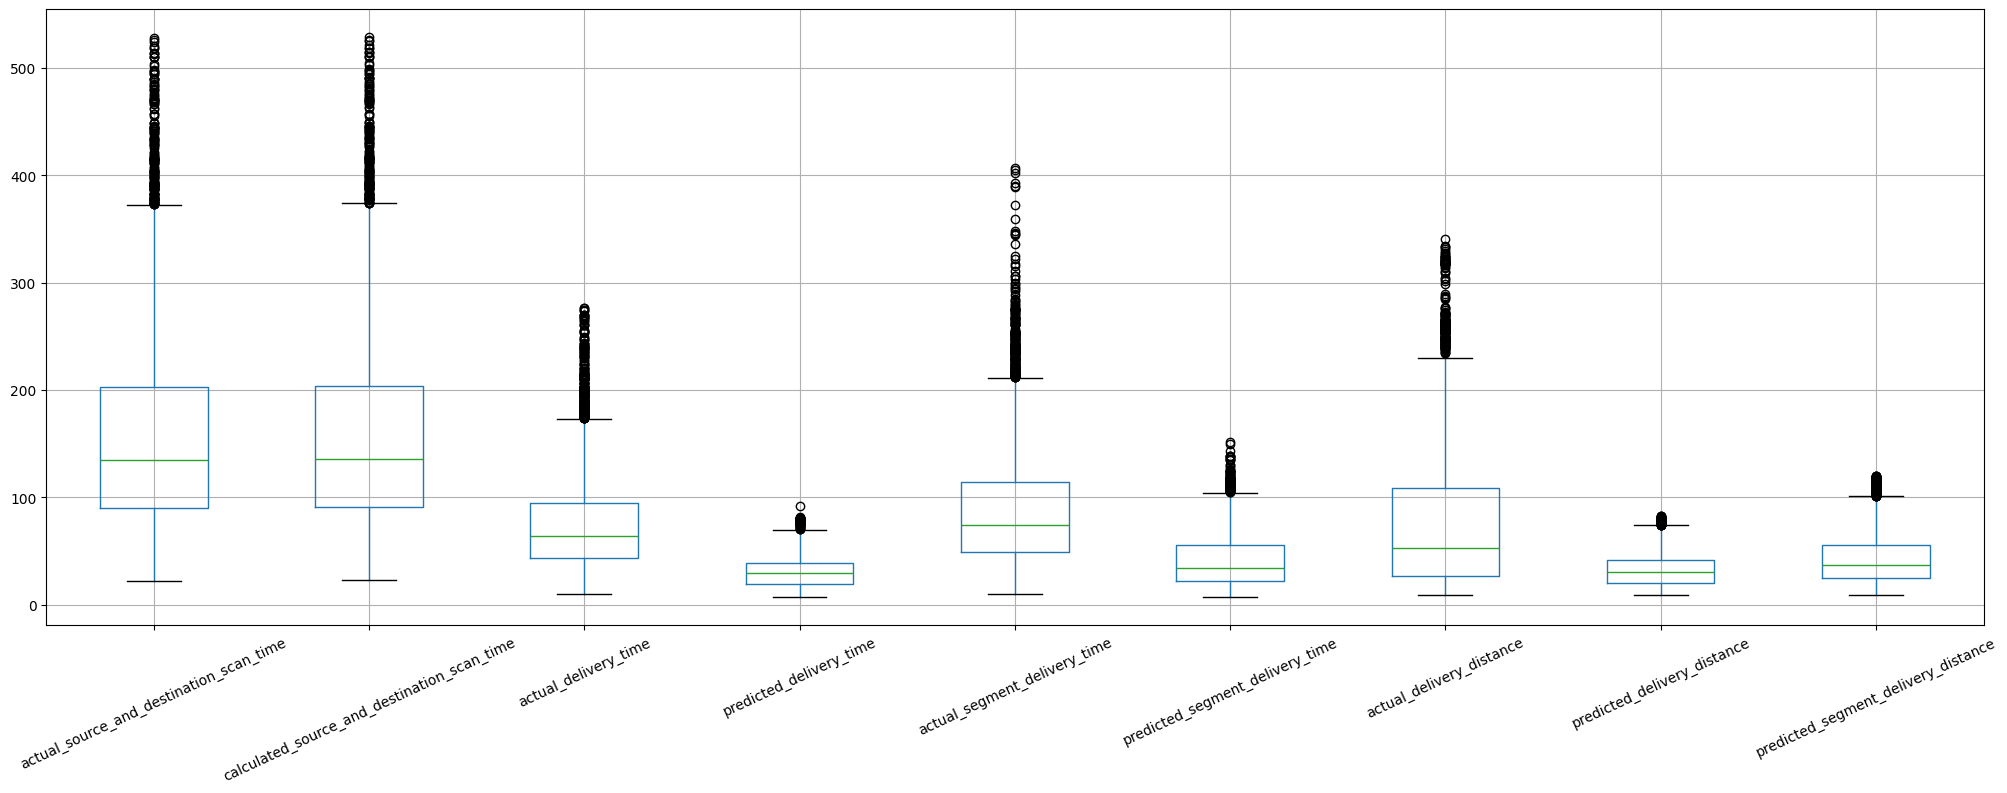

In [223]:
# Data Visualization after treatment of outlier
#  Visualizing by using box plot for trained data
final_train_df[float_column_list].boxplot(figsize = (25,8), rot=25)

<Axes: >

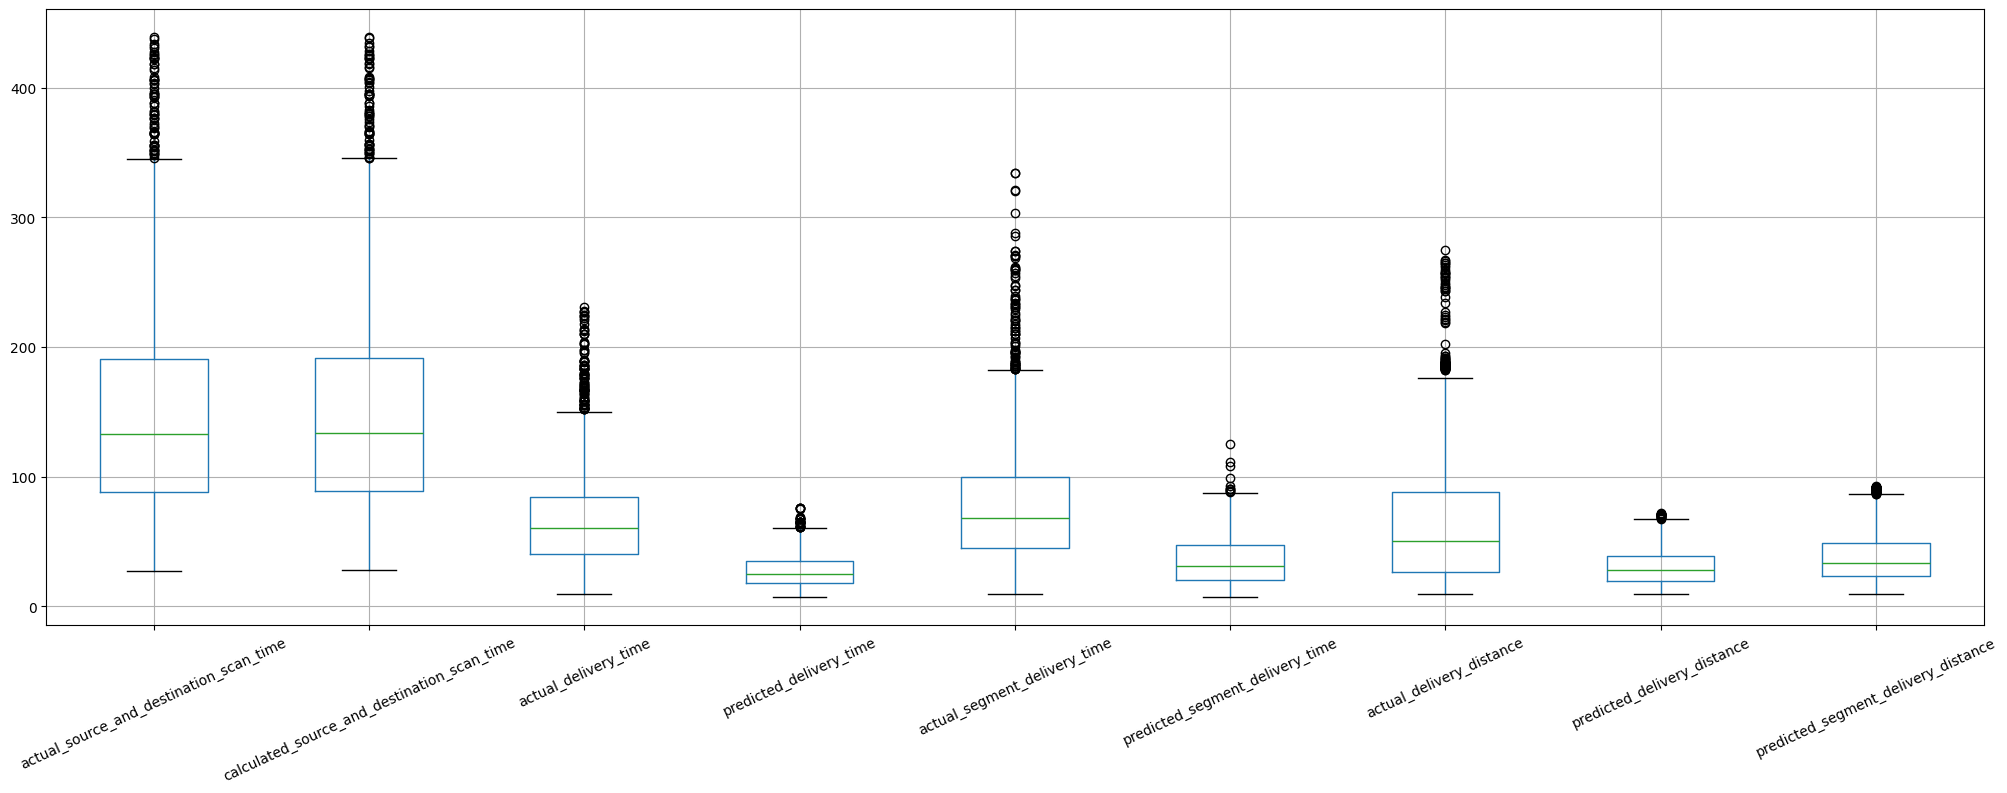

In [224]:
#  Visualizing by using box plot for test data
final_test_df[float_column_list].boxplot(figsize = (25,8), rot=25)

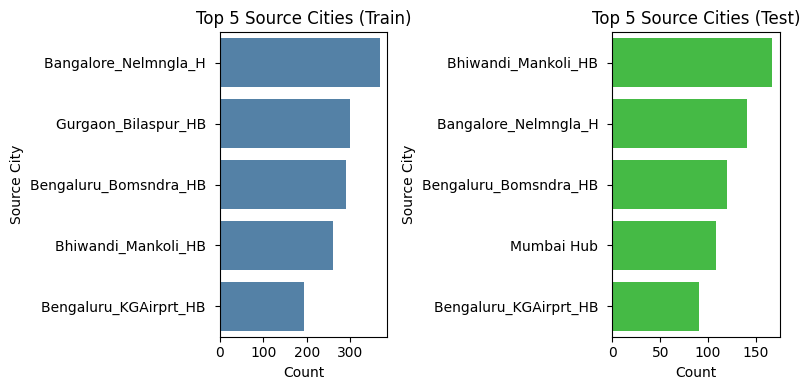

In [225]:
# Most number of trips starting from:
top_5_source_city_train=final_train_df['source_city_name'].value_counts().head(5)
top_5_source_city_test=final_test_df['source_city_name'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for train data
sns.barplot(ax=axes[0], x=top_5_source_city_train.values, y=top_5_source_city_train.index, color='#4682B4')
axes[0].set_title('Top 5 Source Cities (Train)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Source City')

# Plot for test data
sns.barplot(ax=axes[1], x=top_5_source_city_test.values, y=top_5_source_city_test.index, color='#32CD32')
axes[1].set_title('Top 5 Source Cities (Test)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Source City')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
- For train data:
  
    *   Most number of trips starting from:Banglore_Nelmngla_H followed by Gurgaon_Bilaspur_HB

- For test data:
    *  Most number of trips starting from:Bhiwandi_Mankoli_HB followed by Banglore_Nelmngla_H



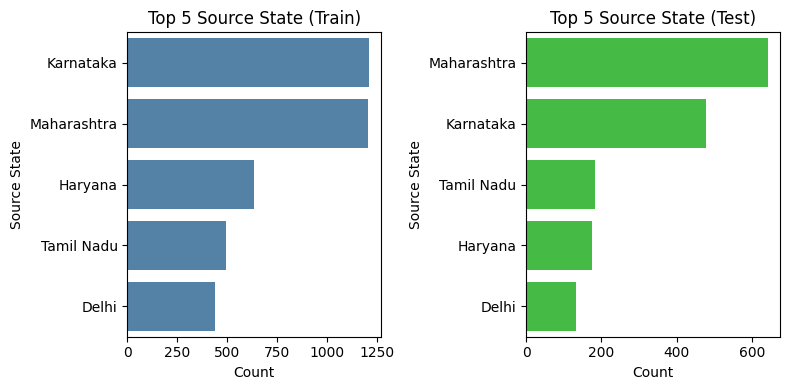

In [226]:
# Most number of trips starting from state:
top_5_source_state_train=final_train_df['source_state_name'].value_counts().head(5)
top_5_source_state_test=final_test_df['source_state_name'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for train data
sns.barplot(ax=axes[0], x=top_5_source_state_train.values, y=top_5_source_state_train.index, color='#4682B4')
axes[0].set_title('Top 5 Source State (Train)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Source State')

# Plot for test data
sns.barplot(ax=axes[1], x=top_5_source_state_test.values, y=top_5_source_state_test.index, color='#32CD32')
axes[1].set_title('Top 5 Source State (Test)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Source State')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**

For train data:

Most number of trips starting from state: Maharashtra and Karnataka and followed by Harayana

For test data:

Most number of trips starting from state: Maharashtra followed by Karnataka

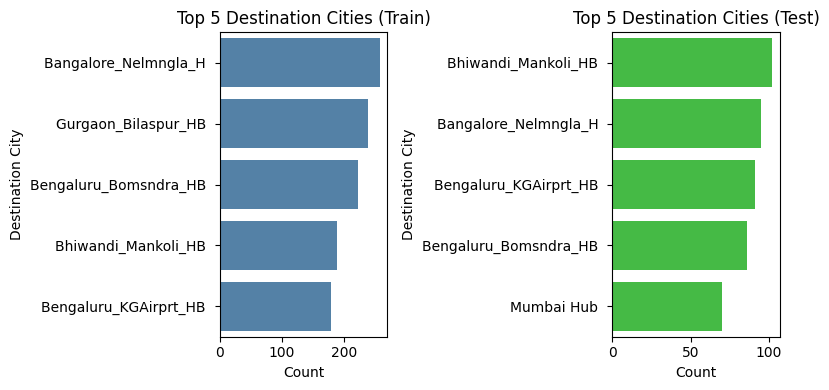

In [227]:
# Most number of trips ending to:
top_5_destination_city_train=final_train_df['destination_city_name'].value_counts().head(5)
top_5_destination_city_test=final_test_df['destination_city_name'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for train data
sns.barplot(ax=axes[0], x=top_5_destination_city_train.values, y=top_5_destination_city_train.index, color='#4682B4')
axes[0].set_title('Top 5 Destination Cities (Train)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Destination City')

# Plot for test data
sns.barplot(ax=axes[1], x=top_5_destination_city_test.values, y=top_5_destination_city_test.index, color='#32CD32')
axes[1].set_title('Top 5 Destination Cities (Test)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Destination City')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
- For train data:
  
    *   Most number of trips end in Banglore_Nelmngla_H followed by Gurgaon_Bilaspur_HB

- For test data:
    *  Most number of trips end in Bhiwandi_Mankoli_HB followed by Banglore_Nelmngla_H

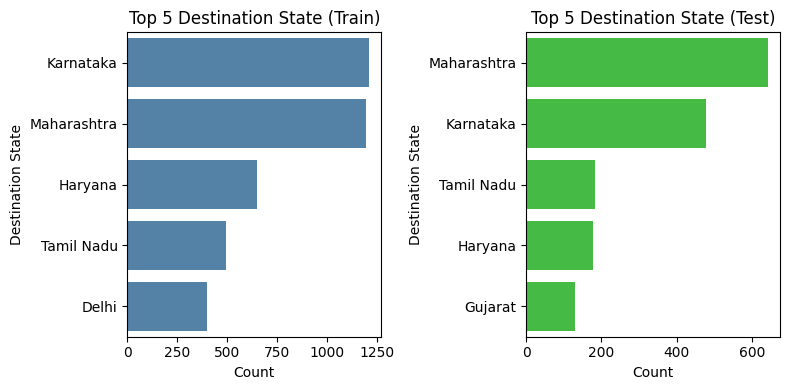

In [228]:
# Most number of trips ending to which state:
top_5_destination_state_train=final_train_df['destination_state_name'].value_counts().head(5)
top_5_destination_state_test=final_test_df['destination_state_name'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for train data
sns.barplot(ax=axes[0], x=top_5_destination_state_train.values, y=top_5_destination_state_train.index, color='#4682B4')
axes[0].set_title('Top 5 Destination State (Train)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Destination State')

# Plot for test data
sns.barplot(ax=axes[1], x=top_5_destination_state_test.values, y=top_5_destination_state_test.index, color='#32CD32')
axes[1].set_title('Top 5 Destination State (Test)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Destination State')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
For both Train and test data Maharashtra and Karnataka is the state where most trips ended.

Text(0, 0.5, 'Count')

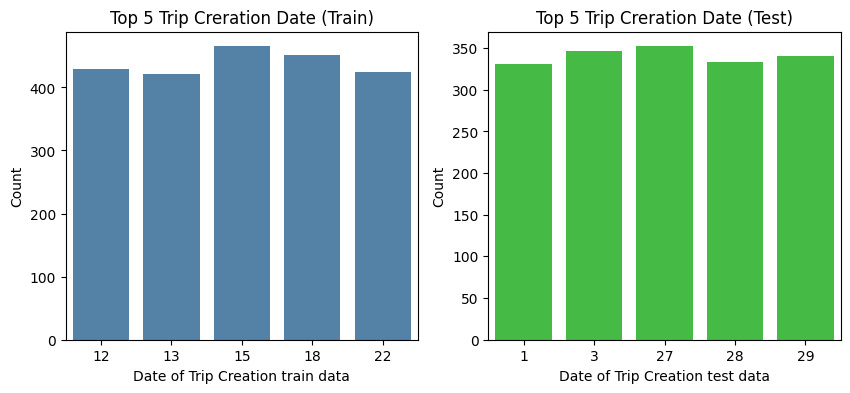

In [229]:
# Top trip creation date
# Define colors for each bar
colors = ['#4682B4', '#32CD32', '#FF6347', '#FFD700', '#9400D3']
top_5_date_of_trip_creation_train=final_train_df['trip_creation_date'].value_counts().head(5)
top_5_date_of_trip_creation_test=final_test_df['trip_creation_date'].value_counts().head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for train data
sns.barplot(ax=axes[0], y=top_5_date_of_trip_creation_train.values, x=top_5_date_of_trip_creation_train.index, color='#4682B4')
axes[0].set_title('Top 5 Trip Creration Date (Train)')
axes[0].set_xlabel('Date of Trip Creation train data')
axes[0].set_ylabel('Count')

# Plot for test data
sns.barplot(ax=axes[1], y=top_5_date_of_trip_creation_test.values, x=top_5_date_of_trip_creation_test.index, color='#32CD32')
axes[1].set_title('Top 5 Trip Creration Date (Test)')
axes[1].set_xlabel('Date of Trip Creation test data')
axes[1].set_ylabel('Count')

**Observation:**
-For Train Data:

   * 15 and 18 are the date where most of trip created.

-For Test Data:

   * 29 is the top date where most of the trip is created.

In [245]:
# bar chart for day time counts train data
day_time=['trip_creation_daytime_category','trip_creation_daytime_category_Evening','trip_creation_daytime_category_Morning','trip_creation_daytime_category_Night']
final_train_df['trip_creation_daytime_category'].value_counts()

,count
trip_creation_daytime_category,
Evening,2051
Night,1789
Afternoon,1060
Morning,964


In [246]:
# bar chart for day time counts train data
day_time=['trip_creation_daytime_category','trip_creation_daytime_category_Evening','trip_creation_daytime_category_Morning','trip_creation_daytime_category_Night']
final_test_df['trip_creation_daytime_category'].value_counts()

,count
trip_creation_daytime_category,
Evening,788
Night,688
Morning,408
Afternoon,365


**Observation:**
* Most of the trips were created during 'Evening' followed by 'Night' time of the day.

In [230]:
# Normalize/ Standardize the numerical features using StandardScaler.
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

def standardize_columns(dataframe, column_list):
    '''
    The function uses the StandarScaler() to standardize columns.
    - Performing standardization separate of previous Feature Engineering steps to visualize data in absolute values and not in z-scores.

    :param
        dataframe: pd.DataFrame
        column_list: list of columns to standardize

    :return
        dataframe: pd.DataFrame
    '''

    for col in column_list:
        dataframe[col] = standardscaler.fit_transform(dataframe[[col]])

    return dataframe

float_column_list = ['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']
final_train_df = standardize_columns(final_train_df, float_column_list)
final_test_df = standardize_columns(final_test_df, float_column_list)

5. Hypothesis Testing:
 1. Perform hypothesis testing / visual analysis between :

 a. actual_time aggregated value and OSRM time aggregated value.

 b. actual_time aggregated value and segment actual time aggregated
 value.

 c. OSRMdistance aggregated value and segment OSRM distance
 aggregated value.

 d. OSRMtimeaggregated value and segment OSRM time aggregated
 value.

 'osrm_time' : 'predicted_delivery_time',

 'osrm_distance' : 'predicted_delivery_distance',

 'segment_osrm_time' : 'predicted_segment_delivery_time',

 'segment_osrm_distance' : 'predicted_segment_delivery_distance',

  'segment_actual_time' : 'actual_segment_delivery_time',

  'actual_time' : 'actual_delivery_time'

In [231]:
# Hypothesis Testing (trained data)
# 1) actual_delivery_time aggregated value and predicted_delivery_time aggregated value
from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_delivery_time is not higher than mean of predicted_delivery_time'
alternative_hypothesis = 'mean of actual_delivery_time is higher than mean of predicted_delivery_time'
sample1 = final_train_df['actual_delivery_time']
sample2 = final_train_df['predicted_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)

if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

9.709635053496167e-15 0.4999999999999961
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_delivery_time is not higher than mean of predicted_delivery_time


In [232]:
# 2) actual_delivery_time aggregated value and actual_segment_delivery_time aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_delivery_time is similer as actual_segment_delivery_time'
alternative_hypothesis = 'mean of actual_delivery_time is different than mean of actual_segment_delivery_time'
sample1 = final_train_df['actual_delivery_time']
sample2 = final_train_df['actual_segment_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2)
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

3.2802821126676244e-15 0.9999999999999973
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_delivery_time is similer as actual_segment_delivery_time


In [233]:
# 3) predicted_delivery_distance aggregated value and predicted_segment_delivery_distance aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance'
alternative_hypothesis = 'mean of predicted_delivery_distance is higher than mean of predicted_segment_delivery_distance'
sample1 = final_train_df['predicted_delivery_distance']
sample2 = final_train_df['predicted_segment_delivery_distance']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

0.0 0.5
Since p-value > 0.05, we fail to reject null hypothesis
mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance


In [234]:
# 4) predicted_delivery_time aggregated value and predicted_segment_delivery_time aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time'
alternative_hypothesis = 'mean of predicted_delivery_time is higher than mean of predicted_segment_delivery_time'
sample1 = final_train_df['predicted_delivery_time']
sample2 = final_train_df['predicted_segment_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

-2.493014405627394e-15 0.500000000000001
Since p-value > 0.05, we fail to reject null hypothesis
mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time


**Test Data**

In [235]:
# Hypothesis Testing (test data)
# 1) actual_delivery_time aggregated value and predicted_delivery_time aggregated value
from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_delivery_time is not higher than mean of predicted_delivery_time'
alternative_hypothesis = 'mean of actual_delivery_time is higher than mean of predicted_delivery_time'
sample1 = final_test_df['actual_delivery_time']
sample2 = final_test_df['predicted_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)

if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

-4.422220401166742e-15 0.5000000000000018
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_delivery_time is not higher than mean of predicted_delivery_time


In [236]:
# 2) actual_delivery_time aggregated value and actual_segment_delivery_time aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_delivery_time is similer as actual_segment_delivery_time'
alternative_hypothesis = 'mean of actual_delivery_time is different than mean of actual_segment_delivery_time'
sample1 = final_test_df['actual_delivery_time']
sample2 = final_test_df['actual_segment_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2)
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

-6.037522463868367e-15 0.9999999999999951
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_delivery_time is similer as actual_segment_delivery_time


In [237]:
# 3) predicted_delivery_distance aggregated value and predicted_segment_delivery_distance aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance'
alternative_hypothesis = 'mean of predicted_delivery_distance is higher than mean of predicted_segment_delivery_distance'
sample1 = final_test_df['predicted_delivery_distance']
sample2 = final_test_df['predicted_segment_delivery_distance']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

3.2570844870868823e-15 0.49999999999999867
Since p-value > 0.05, we fail to reject null hypothesis
mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance


In [238]:
# 4) predicted_delivery_time aggregated value and predicted_segment_delivery_time aggregated value.
from scipy.stats import ttest_ind
null_hypothesis = 'mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time'
alternative_hypothesis = 'mean of predicted_delivery_time is higher than mean of predicted_segment_delivery_time'
sample1 = final_test_df['predicted_delivery_time']
sample2 = final_test_df['predicted_segment_delivery_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)
if(p_value < 0.05):
 print('Since, p-value < 0.05, the null hypothesis is rejected')
 print(alternative_hypothesis)
else:
 print('Since p-value > 0.05, we fail to reject null hypothesis')
 print(null_hypothesis)

-2.9922808702505497e-15 0.5000000000000012
Since p-value > 0.05, we fail to reject null hypothesis
mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time


**Observatons:**
  - *For train data:*

    *   mean of actual_delivery_time is not higher than mean of predicted_delivery_time.
    *   mean of actual_delivery_time is similer as actual_segment_delivery_time.
    *   mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance.
    *   mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time.

  - *For test data:*

    *  mean of actual_delivery_time is not higher than mean of predicted_delivery_time.
    *  mean of actual_delivery_time is similer as actual_segment_delivery_time.
    *  mean of predicted_delivery_distance is similer as mean of predicted_segment_delivery_distance.
    *  mean of predicted_delivery_time is similer as mean of predicted_segment_delivery_time.

